In [1]:
# Builing a Compartmetal Model

from sympy import Max

from epymorph import *
from epymorph.compartment_model import *

# Runing the Simulation
from functools import partial

from epymorph.initializer import single_location

In [64]:
from pygris import block_groups 


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pygris import geocode
import folium
from pygris import block_groups 


/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_32354/3457571314.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [65]:
STATE = 'AZ'
COUNTY = 'Maricopa'
YEAR = 2019
census_block_groups = block_groups(state = STATE, county = COUNTY, year = YEAR, cache=False)


Using FIPS code '04' for input 'AZ'
Using FIPS code '013' for input 'Maricopa'


# HealthData.gov


In [2]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("healthdata.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(healthdata.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("anag-cw7u", limit=1_026_401)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

In [191]:
Facility = '/Users/alexandernez/Desktop/Github/Epymorph_vignettes/scratch/SDH/COVID-19_Report_04-08-2024.csv'

Facility_df = pd.read_csv(Facility, low_memory=False, dtype = {'fips_code': str, 'zip': str})

Maricopa_Facility = Facility_df[(Facility_df['state'] == 'AZ') & (Facility_df['fips_code'] == '04013')]

Maricopa_Facility

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
393,030022,2020/06/07,AZ,030022,VALLEYWISE HEALTH MEDICAL CENTER,2601 EAST ROOSEVELT STREET,PHOENIX,85008,Short Term,04013,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
394,030036,2020/05/10,AZ,030036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,85224,Short Term,04013,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
398,030093,2020/04/26,AZ,030093,BANNER DEL E. WEBB MEDICAL CENTER,14502 WEST MEEKER BOULEVARD,SUN CITY WEST,85375,Short Term,04013,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
399,033302,2020/05/10,AZ,033302,PHOENIX CHILDREN'S HOSPITAL,1919 EAST THOMAS ROAD,PHOENIX,85016,Childrens Hospitals,04013,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
770,030092,2020/05/17,AZ,030092,HONORHEALTH DEER VALLEY MEDICAL CENTER,19829 NORTH 27TH AVENUE,PHOENIX,85027,Short Term,04013,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024227,030089,2024/02/18,AZ,030089,BANNER THUNDERBIRD MEDICAL CENTER,5555 WEST THUNDERBIRD ROAD,GLENDALE,85306,Short Term,04013,...,0.0,0.0,7,0.0,-999999.0,7,14.0,17.0,7,119.0
1024269,030092,2022/12/11,AZ,030092,HONORHEALTH DEER VALLEY MEDICAL CENTER,19829 NORTH 27TH AVENUE,PHOENIX,85027,Short Term,04013,...,0.0,0.0,6,0.0,0.0,6,0.0,0.0,6,0.0
1024334,030061,2021/08/15,AZ,030061,BANNER BOSWELL MEDICAL CENTER,10401 WEST THUNDERBIRD BOULEVARD,SUN CITY,85351,Short Term,04013,...,NaN,NaN,0,NaN,0.0,7,0.0,0.0,7,0.0
1024478,030131,2022/11/20,AZ,030131,O.A.S.I.S. HOSPITAL,750 NORTH 40TH STREET,PHOENIX,85008,Short Term,04013,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0


In [192]:
Maricopa_Facility['collection_week'] = pd.to_datetime(Maricopa_Facility['collection_week'])

# Find min and max of collection_week
min_date = Maricopa_Facility['collection_week'].min()
max_date = Maricopa_Facility['collection_week'].max()

print(f"Minimum collection week date: {min_date}")
print(f"Maximum collection week date: {max_date}")

Minimum collection week date: 2020-03-22 00:00:00
Maximum collection week date: 2024-03-24 00:00:00


/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_32354/2027726363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Maricopa_Facility['collection_week'] = pd.to_datetime(Maricopa_Facility['collection_week'])


In [156]:
Facility = '/Users/alexandernez/Desktop/Github/Epymorph_vignettes/scratch/SDH/COVID-19_Report_04-08-2024.csv'

Facility_df = pd.read_csv(Facility, low_memory=False, dtype = {'fips_code': str, 'zip': str})

Maricopa_Facility = Facility_df[(Facility_df['state'] == 'AZ') & (Facility_df['fips_code'] == '04013')]
Maricopa_Facility = Maricopa_Facility[(Maricopa_Facility['collection_week'] >= '2020-10-01') & (Maricopa_Facility['collection_week'] <= '2023-12-31')]

Maricopa_Facility

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
7775,032006,2022/06/19,AZ,032006,"KPC PROMISE HOSPITAL OF PHOENIX, LLC",433 EAST 6TH STREET,MESA,85203,Long Term,04013,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
7798,030121,2022/06/19,AZ,030121,"MOUNTAIN VISTA MEDICAL CENTER, LP",1301 SOUTH CRISMON ROAD,MESA,85209,Short Term,04013,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
7813,030038,2022/07/03,AZ,030038,HONORHEALTH SCOTTSDALE OSBORN MEDICAL CENTER,7400 EAST OSBORN ROAD,SCOTTSDALE,85251,Short Term,04013,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
8038,032001,2022/12/25,AZ,032001,SELECT SPECIALTY HOSPITAL PHOENIX,"350 WEST THOMAS ROAD, 3RD FLOOR",PHOENIX,85013,Long Term,04013,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
8226,030112,2022/10/02,AZ,030112,ARIZONA SPECIALTY HOSPITAL,"2905 WEST WARNER ROAD, SUITE 1",CHANDLER,85224,Short Term,04013,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022670,030112,2022/09/25,AZ,030112,ARIZONA SPECIALTY HOSPITAL,"2905 WEST WARNER ROAD, SUITE 1",CHANDLER,85224,Short Term,04013,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
1023150,032006,2022/02/20,AZ,032006,"KPC PROMISE HOSPITAL OF PHOENIX, LLC",433 EAST 6TH STREET,MESA,85203,Long Term,04013,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
1023519,030121,2022/10/23,AZ,030121,"MOUNTAIN VISTA MEDICAL CENTER, LP",1301 SOUTH CRISMON ROAD,MESA,85209,Short Term,04013,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
1024269,030092,2022/12/11,AZ,030092,HONORHEALTH DEER VALLEY MEDICAL CENTER,19829 NORTH 27TH AVENUE,PHOENIX,85027,Short Term,04013,...,0.0,0.0,6,0.0,0.0,6,0.0,0.0,6,0.0


In [194]:
Maricopa_Facility = Maricopa_Facility.filter(["hospital_pk",
                      "zip",
                      "hospital_name",
                      "fips_code",
                      "address",
                      "city",
                      "state", 
                      'geocoded_hospital_address',
                      "collection_week",
                      'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
                      'total_beds_7_day_sum',
                      'inpatient_beds_used_7_day_sum',
                      "total_patients_hospitalized_confirmed_influenza_7_day_avg",
                      "total_patients_hospitalized_confirmed_influenza_7_day_sum",
                      "total_patients_hospitalized_confirmed_influenza_7_day_coverage",
                      "previous_day_admission_influenza_confirmed_7_day_sum"])
Maricopa_Facility.head()

,hospital_pk,zip,hospital_name,fips_code,address,city,state,geocoded_hospital_address,collection_week,total_adult_patients_hospitalized_confirmed_covid_7_day_avg,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_avg,total_patients_hospitalized_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_coverage,previous_day_admission_influenza_confirmed_7_day_sum
777,032005,85006,SELECT SPECIALTY HOSPITAL ARIZONA,04013,"1111 EAST MCDOWELL RD, 11TH FLOOR",PHOENIX,AZ,POINT (-112.059699349 33.463938275),2023-06-25,0.0,NaN,165.0,0.0,0.0,7,0.0
3544,030112,85224,ARIZONA SPECIALTY HOSPITAL,04013,"2905 WEST WARNER ROAD, SUITE 1",CHANDLER,AZ,POINT (-111.891403558 33.333922761),2020-10-11,NaN,NaN,NaN,NaN,NaN,0,NaN
7265,032006,85203,"KPC PROMISE HOSPITAL OF PHOENIX, LLC",04013,433 EAST 6TH STREET,MESA,AZ,POINT (-111.82156831 33.425921646),2023-08-27,0.0,NaN,134.0,0.0,0.0,7,0.0
7744,030093,85375,BANNER DEL E. WEBB MEDICAL CENTER,04013,14502 WEST MEEKER BOULEVARD,SUN CITY WEST,AZ,POINT (-112.373618471 33.660653286),2021-01-31,97.0,3888.0,2222.0,0.0,0.0,7,0.0
7774,030094,85308,ABRAZO ARROWHEAD CAMPUS,04013,18701 NORTH 67TH AVENUE,GLENDALE,AZ,POINT (-112.201414198 33.655736253),2021-10-03,41.4,1842.0,1512.0,0.0,0.0,7,0.0


In [195]:
columns_to_replace = [
    'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
    'total_beds_7_day_sum',
    'inpatient_beds_used_7_day_sum',
    'total_patients_hospitalized_confirmed_influenza_7_day_avg',
    'total_patients_hospitalized_confirmed_influenza_7_day_sum',
    'total_patients_hospitalized_confirmed_influenza_7_day_coverage',
    'previous_day_admission_influenza_confirmed_7_day_sum'
]

Maricopa_Facility[columns_to_replace] = Maricopa_Facility[columns_to_replace].replace(-999999, 0)
Maricopa_Facility[columns_to_replace] = Maricopa_Facility[columns_to_replace].fillna(0)

Maricopa_Facility

,hospital_pk,zip,hospital_name,fips_code,address,city,state,geocoded_hospital_address,collection_week,total_adult_patients_hospitalized_confirmed_covid_7_day_avg,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_avg,total_patients_hospitalized_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_coverage,previous_day_admission_influenza_confirmed_7_day_sum
777,032005,85006,SELECT SPECIALTY HOSPITAL ARIZONA,04013,"1111 EAST MCDOWELL RD, 11TH FLOOR",PHOENIX,AZ,POINT (-112.059699349 33.463938275),2023-06-25,0.0,0.0,165.0,0.0,0.0,7,0.0
3544,030112,85224,ARIZONA SPECIALTY HOSPITAL,04013,"2905 WEST WARNER ROAD, SUITE 1",CHANDLER,AZ,POINT (-111.891403558 33.333922761),2020-10-11,0.0,0.0,0.0,0.0,0.0,0,0.0
7265,032006,85203,"KPC PROMISE HOSPITAL OF PHOENIX, LLC",04013,433 EAST 6TH STREET,MESA,AZ,POINT (-111.82156831 33.425921646),2023-08-27,0.0,0.0,134.0,0.0,0.0,7,0.0
7744,030093,85375,BANNER DEL E. WEBB MEDICAL CENTER,04013,14502 WEST MEEKER BOULEVARD,SUN CITY WEST,AZ,POINT (-112.373618471 33.660653286),2021-01-31,97.0,3888.0,2222.0,0.0,0.0,7,0.0
7774,030094,85308,ABRAZO ARROWHEAD CAMPUS,04013,18701 NORTH 67TH AVENUE,GLENDALE,AZ,POINT (-112.201414198 33.655736253),2021-10-03,41.4,1842.0,1512.0,0.0,0.0,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024056,030094,85308,ABRAZO ARROWHEAD CAMPUS,04013,18701 NORTH 67TH AVENUE,GLENDALE,AZ,POINT (-112.201414198 33.655736253),2023-01-15,4.9,0.0,1225.0,0.0,14.0,7,0.0
1024269,030092,85027,HONORHEALTH DEER VALLEY MEDICAL CENTER,04013,19829 NORTH 27TH AVENUE,PHOENIX,AZ,POINT (-112.116265126 33.665619271),2022-12-11,13.5,0.0,1211.0,6.3,38.0,6,0.0
1024334,030061,85351,BANNER BOSWELL MEDICAL CENTER,04013,10401 WEST THUNDERBIRD BOULEVARD,SUN CITY,AZ,POINT (-112.283178741 33.603885297),2021-08-15,24.6,3178.0,1746.0,0.0,0.0,7,0.0
1024478,030131,85008,O.A.S.I.S. HOSPITAL,04013,750 NORTH 40TH STREET,PHOENIX,AZ,POINT (-111.996048937 33.456714667),2022-11-20,0.0,0.0,83.0,0.0,0.0,7,0.0


In [196]:
Maricopa_Facility['collection_week'] = pd.to_datetime(Maricopa_Facility['collection_week'])

Maricopa_Facility_sorted = Maricopa_Facility.sort_values(['hospital_name', 'collection_week'])

Maricopa_Facility_df = Maricopa_Facility_sorted.groupby('hospital_name').agg({
    "hospital_pk": 'first',
    "zip": 'first',
    "fips_code": 'first',
    "address": 'first',
    'city': 'first',
    'geocoded_hospital_address': 'first',
    'collection_week': list,
    'total_adult_patients_hospitalized_confirmed_covid_7_day_avg': list,
    'total_beds_7_day_sum': list,
    'inpatient_beds_used_7_day_sum': list,
    'total_patients_hospitalized_confirmed_influenza_7_day_avg': list,
    'total_patients_hospitalized_confirmed_influenza_7_day_sum': list,
    'total_patients_hospitalized_confirmed_influenza_7_day_coverage': list,
    'previous_day_admission_influenza_confirmed_7_day_sum': list,
}).reset_index()
Maricopa_Facility_df

,hospital_name,hospital_pk,zip,fips_code,address,city,geocoded_hospital_address,collection_week,total_adult_patients_hospitalized_confirmed_covid_7_day_avg,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_avg,total_patients_hospitalized_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_coverage,previous_day_admission_influenza_confirmed_7_day_sum
0,ABRAZO ARROWHEAD CAMPUS,030094,85308,04013,18701 NORTH 67TH AVENUE,GLENDALE,POINT (-112.201414198 33.655736253),"[2020-10-04 00:00:00, 2020-10-11 00:00:00, 202...","[5.4, 6.6, 5.4, 9.0, 13.0, 13.4, 21.3, 35.1, 4...","[1775.0, 1122.0, 1454.0, 1586.0, 1653.0, 1721....","[1162.0, 1115.0, 1275.0, 1432.0, 1449.0, 1538....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, ..."
1,ABRAZO CENTRAL CAMPUS,030030,85015,04013,2000 WEST BETHANY HOME ROAD,PHOENIX,POINT (-112.102460634 33.525400634),"[2020-10-04 00:00:00, 2020-10-11 00:00:00, 202...","[4.7, 6.3, 4.7, 6.6, 4.9, 9.1, 15.9, 24.1, 28....","[1341.0, 926.0, 923.0, 946.0, 982.0, 1061.0, 9...","[693.0, 752.0, 736.0, 761.0, 727.0, 743.0, 736...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 6.0, 19.0,...","[0, 0, 0, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, ..."
2,ABRAZO SCOTTSDALE CAMPUS,030083,85032,04013,3929 EAST BELL ROAD,PHOENIX,POINT (-111.996917637 33.639579003),"[2020-10-04 00:00:00, 2020-10-11 00:00:00, 202...","[0.0, 0.0, 5.4, 10.1, 15.1, 18.0, 19.1, 21.4, ...","[1036.0, 470.0, 660.0, 486.0, 497.0, 450.0, 46...","[354.0, 362.0, 436.0, 451.0, 434.0, 410.0, 414...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, 5.0, 12.0,...","[0, 0, 0, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, ..."
3,ABRAZO WEST CAMPUS,030110,85395,04013,13677 WEST MCDOWELL ROAD,GOODYEAR,POINT (-112.353545824 33.461980053),"[2020-10-04 00:00:00, 2020-10-11 00:00:00, 202...","[7.4, 9.6, 11.1, 14.7, 19.0, 28.9, 34.1, 39.3,...","[1670.0, 1700.0, 1464.0, 1484.0, 1527.0, 1560....","[1148.0, 1258.0, 1296.0, 1336.0, 1352.0, 1392....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 8.0, ...","[0, 0, 0, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,ARIZONA SPECIALTY HOSPITAL,030112,85224,04013,"2905 WEST WARNER ROAD, SUITE 1",CHANDLER,POINT (-111.891403558 33.333922761),"[2020-10-04 00:00:00, 2020-10-11 00:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 234.0, 273.0, 273.0, 273....","[0.0, 0.0, 0.0, 0.0, 50.0, 36.0, 27.0, 15.0, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,ARIZONA SPINE AND JOINT HOSPITAL,030107,85206,04013,4620 EAST BASELINE ROAD,MESA,POINT (-111.734641516 33.379744991),"[2020-10-04 00:00:00, 2020-10-11 00:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[69.0, 69.0, 69.0, 69.0, 138.0, 115.0, 161.0, ...","[0.0, 32.0, 15.0, 13.0, 99.0, 115.0, 161.0, 45...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 3, 5, 7, 7, 6, 7, 6, 6, 7, 6, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,BANNER - UNIVERSITY MEDICAL CENTER PHOENIX,030002,85006,04013,1111 EAST MCDOWELL ROAD,PHOENIX,POINT (-112.059699349 33.463938275),"[2020-10-04 00:00:00, 2020-10-11 00:00:00, 202...","[18.1, 19.0, 20.9, 24.3, 34.3, 38.4, 49.9, 78....","[5316.0, 5284.0, 5278.0, 5275.0, 5292.0, 5296....","[3111.0, 3050.0, 3232.0, 3118.0, 3069.0, 3436....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [127]:
longitudes = []
latitudes = []
geoids = []
failed_addresses = [] 

for index, row in Maricopa_Facility_df.iterrows():
    full_address = f"{row['address']}, {row['city']}, Arizona, {row['zip']}"

    try:
        result = geocode(address=full_address)
        
        latitude = result['latitude'].iloc[0] if 'latitude' in result and not result['latitude'].empty else None
        longitude = result['longitude'].iloc[0] if 'longitude' in result and not result['longitude'].empty else None
        
        geoid = str(result['GEOID'].iloc[0]) if 'GEOID' in result and not result['GEOID'].empty else None
        
        longitudes.append(longitude)
        latitudes.append(latitude)
        geoids.append(geoid)
    except ValueError as e:
        print(f"Error geocoding address {full_address}: {e}")
        longitudes.append(None)
        latitudes.append(None)
        geoids.append(None)
        failed_addresses.append(row)  

Maricopa_Facility_df['Hospital_Lat'] = latitudes
Maricopa_Facility_df['Hospital_Lon'] = longitudes
Maricopa_Facility_df['GEOID'] = geoids

Maricopa_Facility_df['GEOID'] = [geoid[:-3] if geoid is not None else None for geoid in Maricopa_Facility_df['GEOID']]

failed_geocoding_df = pd.DataFrame(failed_addresses)

failed_geocoding_df

Error geocoding address 4620 EAST BASELINE ROAD, MESA, Arizona, 85206: Length mismatch: Expected axis has 0 elements, new values have 2 elements
Error geocoding address 9201 WEST THOMAS ROAD, PHOENIX, Arizona, 85037: Length mismatch: Expected axis has 0 elements, new values have 2 elements
Error geocoding address 9130 EAST ELLIOT ROAD, MESA, Arizona, 85212: Length mismatch: Expected axis has 0 elements, new values have 2 elements
Error geocoding address 1301 SOUTH CRISMON ROAD, MESA, Arizona, 85209: Length mismatch: Expected axis has 0 elements, new values have 2 elements
Error geocoding address 14200 WEST CELEBRATE LIFE WAY, GOODYEAR, Arizona, 85338: Length mismatch: Expected axis has 0 elements, new values have 2 elements


,hospital_name,hospital_pk,zip,fips_code,address,city,collection_week,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_avg,total_patients_hospitalized_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_coverage,previous_day_admission_influenza_confirmed_7_day_sum
5,ARIZONA SPINE AND JOINT HOSPITAL,030107,85206,04013,4620 EAST BASELINE ROAD,MESA,"[2022-01-02 00:00:00, 2022-01-09 00:00:00, 202...","[161.0, 161.0, 138.0, 161.0, 69.0, 161.0, 92.0...","[33.0, 69.0, 6.0, 32.0, 64.0, 74.0, 71.0, 63.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
11,BANNER ESTRELLA MEDICAL CENTER,030115,85037,04013,9201 WEST THOMAS ROAD,PHOENIX,"[2022-01-02 00:00:00, 2022-01-09 00:00:00, 202...","[2968.0, 2968.0, 2968.0, 1696.0, 0.0, 0.0, 0.0...","[2617.0, 2724.0, 2810.0, 2732.0, 2549.0, 2355....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[11.0, 0.0, 0.0, 0.0, 5.0, 0.0, 14.0, 16.0, 19...","[4, 0, 0, 0, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 7.0, 9.0, ..."
18,DIGNITY HEALTH ARIZONA GENERAL HOSPITAL,030139,85212,04013,9130 EAST ELLIOT ROAD,MESA,"[2022-01-02 00:00:00, 2022-01-09 00:00:00, 202...","[1106.0, 1106.0, 1106.0, 1106.0, 1106.0, 1106....","[345.0, 348.0, 336.0, 332.0, 334.0, 330.0, 281...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28,"MOUNTAIN VISTA MEDICAL CENTER, LP",030121,85209,04013,1301 SOUTH CRISMON ROAD,MESA,"[2022-01-02 00:00:00, 2022-01-09 00:00:00, 202...","[1407.0, 1407.0, 1407.0, 1407.0, 1407.0, 1407....","[750.0, 838.0, 828.0, 848.0, 734.0, 788.0, 809...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
38,WESTERN REGIONAL MEDICAL CENTER,030138,85338,04013,14200 WEST CELEBRATE LIFE WAY,GOODYEAR,"[2022-01-02 00:00:00, 2022-01-09 00:00:00, 202...","[240.0, 216.0, 190.0, 190.0, 190.0, 190.0, 114...","[25.0, 58.0, 66.0, 67.0, 57.0, 60.0, 65.0, 65....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7, 7, 6, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [197]:
from shapely import wkt
import geopandas as gpd

# Convert WKT formatted strings to Point geometries
Maricopa_Facility_df['geometry'] = Maricopa_Facility_df['geocoded_hospital_address'].apply(wkt.loads)

# Create a GeoDataFrame, explicitly setting the geometry column
Maricopa_Facility_df = gpd.GeoDataFrame(Maricopa_Facility_df, geometry='geometry')


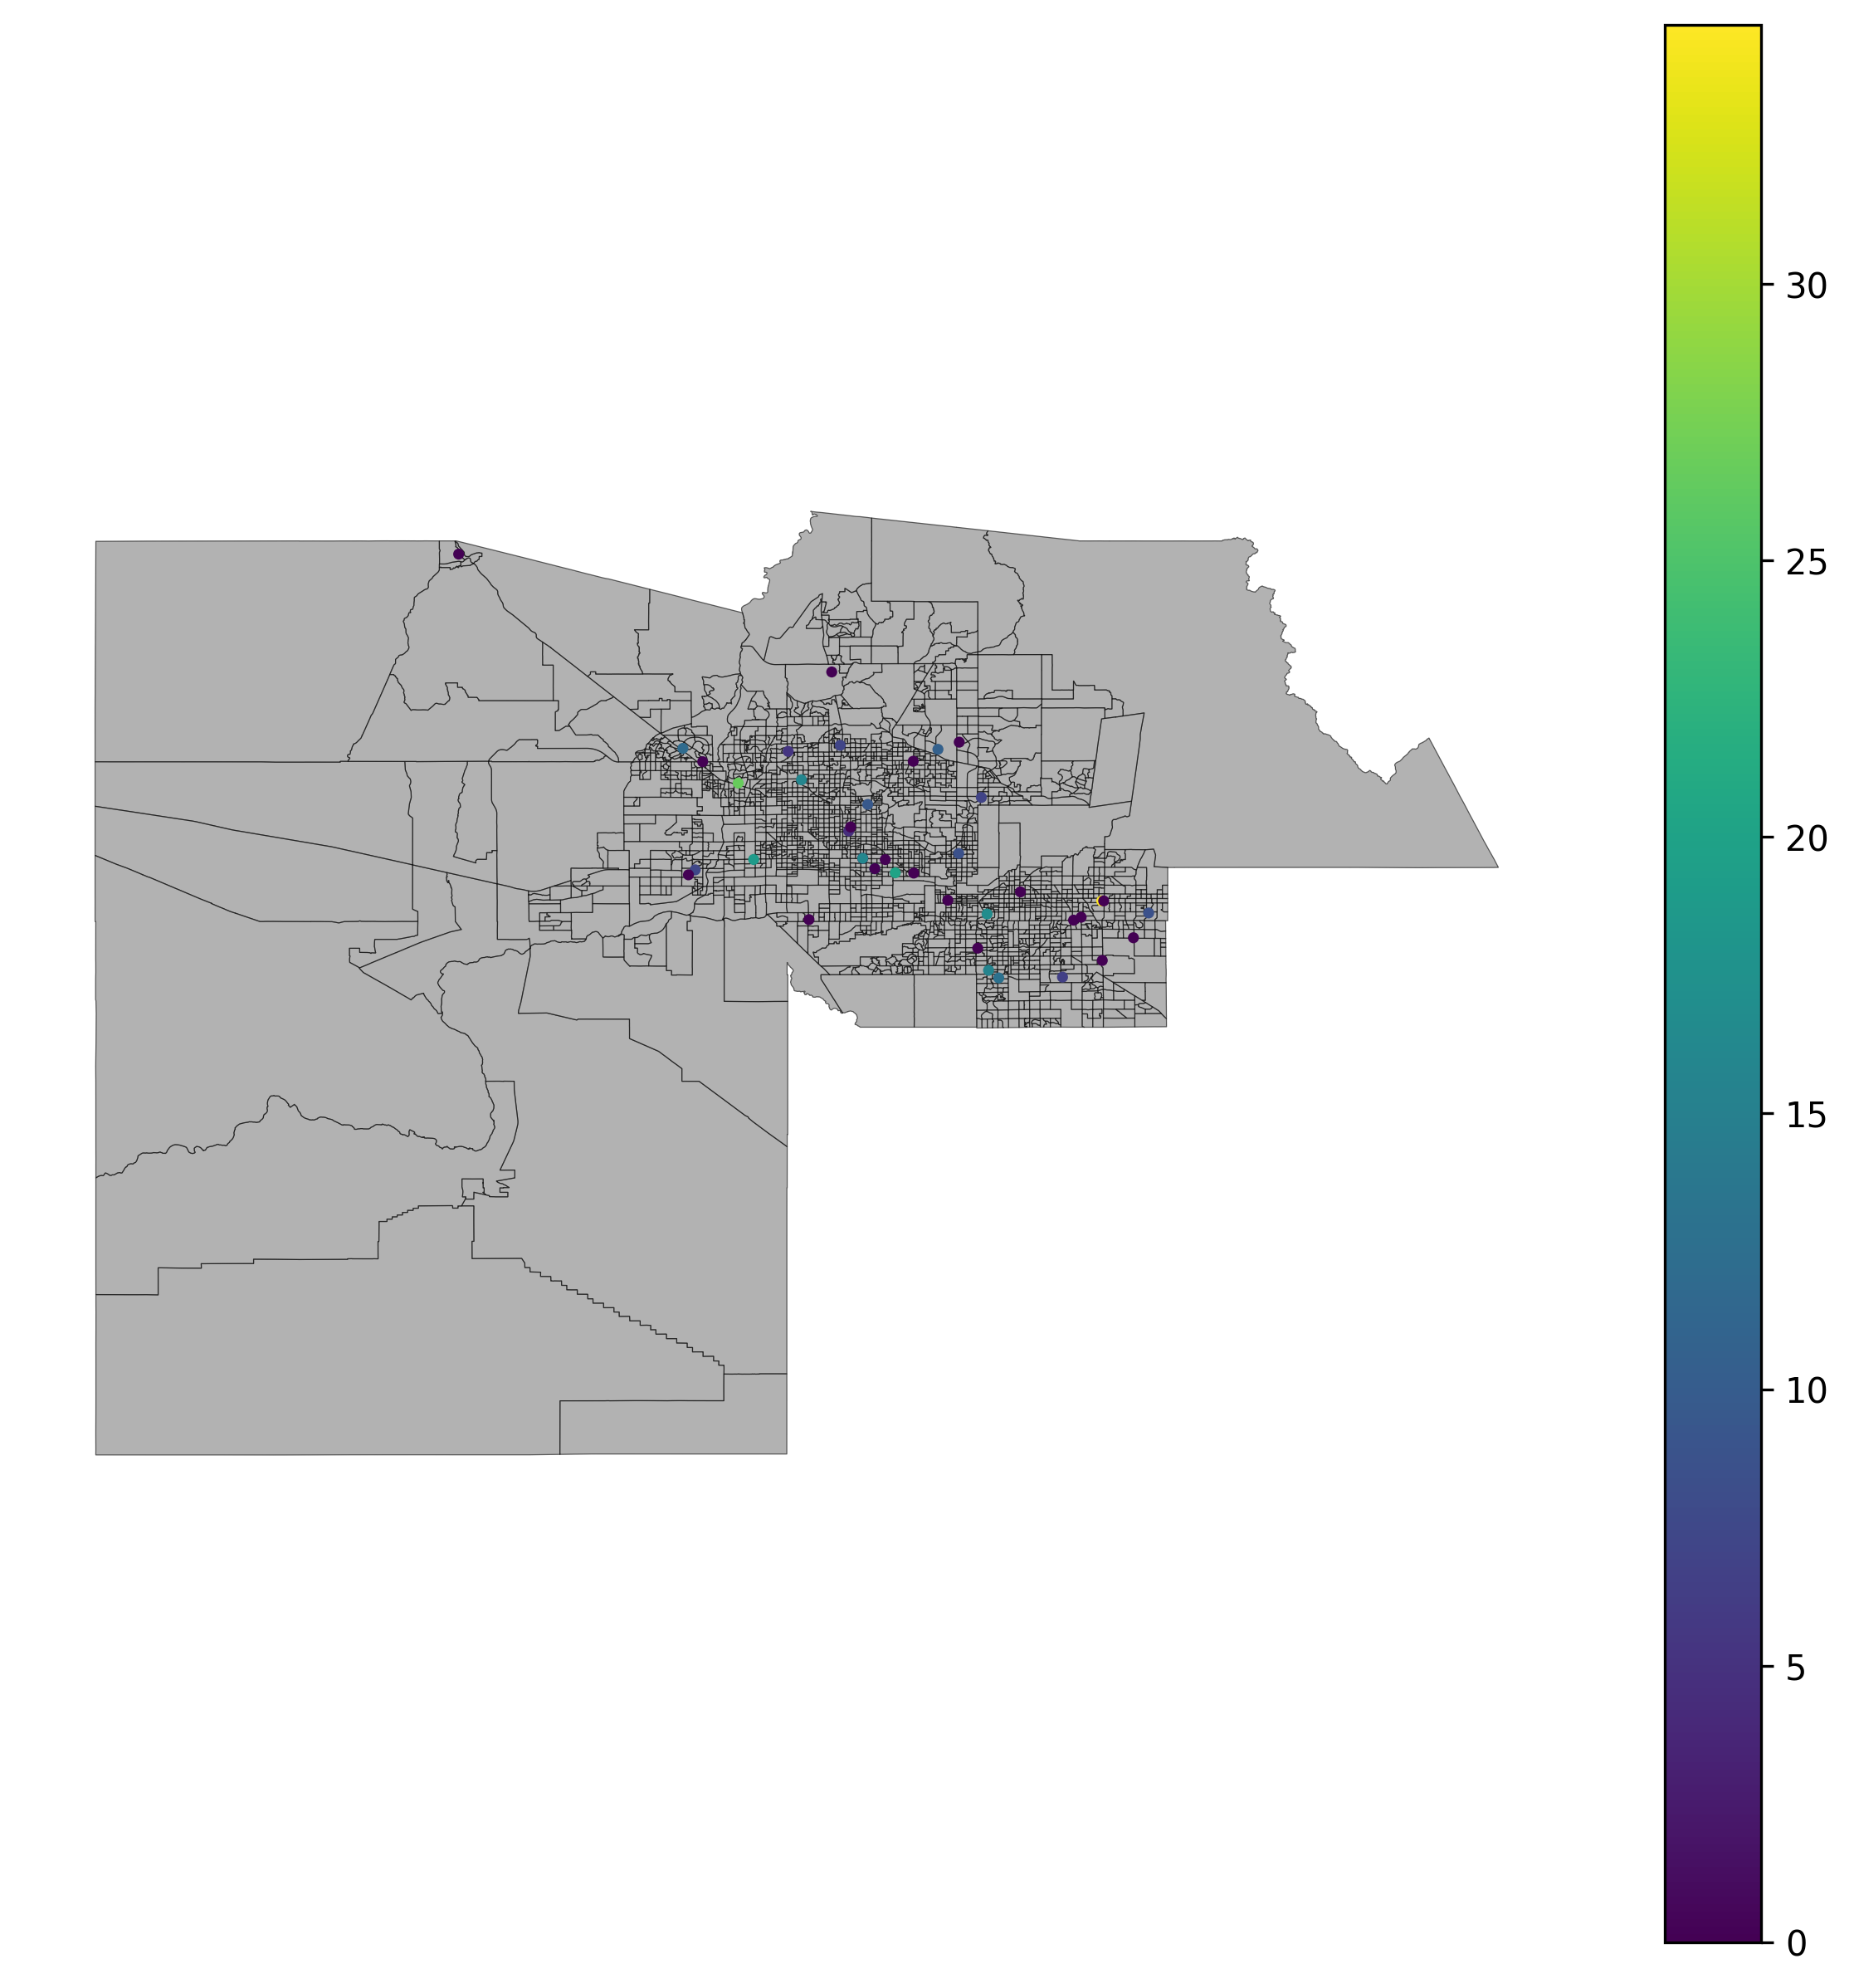

In [198]:
Maricopa_Facility_df['first_total_beds'] = Maricopa_Facility_df['total_adult_patients_hospitalized_confirmed_covid_7_day_avg'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

census_block_groups.plot(linewidth=0.3, ax=ax, edgecolor='black', color='grey', alpha=0.6)

vmin = Maricopa_Facility_df['first_total_beds'].min()
vmax = Maricopa_Facility_df['first_total_beds'].max()

Maricopa_Facility_df.plot(ax=ax, column='first_total_beds', edgecolor='black', linewidth=0.01, 
                           marker='o', cmap='viridis', markersize=10, vmin=vmin, vmax=vmax, legend=True)

ax.axis('off')
plt.show()


In [167]:

mean_lat = Maricopa_Facility_df['Hospital_Lat'].mean()
mean_lon = Maricopa_Facility_df['Hospital_Lon'].mean()

# Add markers for each hospital
for idx, row in Maricopa_Facility_df.iterrows():
    folium.Marker([row['Hospital_Lat'], row['Hospital_Lon']], popup=row['hospital_name']).add_to(m)

# Display the map
m

KeyError: ['Hospital_Lat', 'Hospital_Lon']

In [184]:
Maricopa_Facility_df['collection_week'] = pd.to_datetime(Maricopa_Facility_df['collection_week'])


TypeError: <class 'list'> is not convertible to datetime, at position 0

In [183]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import imageio
import os
import pandas as pd  # Ensure pandas is imported

frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)


vmin, vmax = Maricopa_Facility_df['total_adult_patients_hospitalized_confirmed_covid_7_day_avg'].min(), Maricopa_Facility_df['total_adult_patients_hospitalized_confirmed_covid_7_day_avg'].max()

# Placeholder for filenames
filenames = []

Maricopa_Facility_df['collection_week'] = pd.to_datetime(Maricopa_Facility_df['collection_week'])

# Corrected loop to sort and iterate through unique collection weeks
for week in sorted(Maricopa_Facility_df['collection_week'].unique()):
    fig, ax = plt.subplots(figsize=(10, 10))
    # Filter for the current week
    week_data = Maricopa_Facility_df[Maricopa_Facility_df['collection_week'] == week]
    # Plot
    week_data.plot(ax=ax, column='total_adult_patients_hospitalized_confirmed_covid_7_day_avg', cmap='viridis', markersize=50, legend=True, vmin=vmin, vmax=vmax)
    ax.axis('off')
    ax.set_title(f'Inpatient Beds Used - Week of {week.strftime("%Y-%m-%d")}')
    frame_filename = f'{frames_dir}/frame_{week.strftime("%Y-%m-%d")}.png'
    plt.savefig(frame_filename, dpi=300)
    plt.close()
    
    filenames.append(frame_filename)

# Creating the GIF
gif_path = 'hospital_beds_usage.gif'
with imageio.get_writer(gif_path, mode='I', duration=0.5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print(f"GIF saved to {gif_path}")


TypeError: <class 'list'> is not convertible to datetime, at position 0

In [79]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import imageio
import os

# Create a directory for the frames
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)

# Convert your DataFrame to a GeoDataFrame if not already done
geometry = [Point(xy) for xy in zip(Maricopa_Facility_df_filtered['Hospital_Lon'], Maricopa_Facility_df_filtered['Hospital_Lat'])]
Maricopa_Facility_geo = gpd.GeoDataFrame(Maricopa_Facility_df_filtered, geometry=geometry)

# Define vmin and vmax for consistent color scaling across all frames
vmin, vmax = Maricopa_Facility_geo['inpatient_beds_used_7_day_sum'].min(), Maricopa_Facility_geo['inpatient_beds_used_7_day_sum'].max()

# Placeholder for filenames
filenames = []

Maricopa_Facility_geo['collection_week'] = pd.to_datetime(Maricopa_Facility_geo['collection_week'])

# Sort and iterate through unique collection weeks
for week in sorted(Maricopa_Facility_geo['collection_week'].unique()):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Filter the GeoDataFrame for the current week
    week_data = Maricopa_Facility_geo[Maricopa_Facility_geo['collection_week'] == week]
    
    # Plot the points with colors based on 'inpatient_beds_used_7_day_sum'
    week_data.plot(ax=ax, column='inpatient_beds_used_7_day_sum', cmap='viridis', markersize=50, legend=True, vmin=vmin, vmax=vmax)
    
    # Customize the plot
    ax.axis('off')
    ax.set_title(f'Inpatient Beds Used - Week of {week}')
    
    # Save the plot as an image file
    frame_filename = f'{frames_dir}/frame_{week}.png'
    plt.savefig(frame_filename, dpi=300)
    plt.close()
    
    filenames.append(frame_filename)

# Create the GIF
gif_path = 'hospital_beds_usage.gif'
with imageio.get_writer(gif_path, mode='I', duration=0.5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)



print(f"GIF saved to {gif_path}")


TypeError: <class 'list'> is not convertible to datetime, at position 0

In [128]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


geometry = [Point(xy) for xy in zip(Maricopa_Facility_df_filtered['Hospital_Lon'], Maricopa_Facility_df_filtered['Hospital_Lat'])]

Maricopa_Facility_geo = gpd.GeoDataFrame(Maricopa_Facility_df_filtered, geometry=geometry)


In [130]:
import matplotlib.pyplot as plt
import geopandas as gpd
import imageio
import os

frames_dir = 'temp_frames'
os.makedirs(frames_dir, exist_ok=True)

In [102]:
Maricopa_Facility_geo['first_collection_week'] = Maricopa_Facility_geo['collection_week'].apply(
        lambda x: x[i] if isinstance(x, list) and len(x) > i else None
    )
Maricopa_Facility_geo

,hospital_name,hospital_pk,zip,fips_code,address,city,collection_week,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_avg,total_patients_hospitalized_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_coverage,previous_day_admission_influenza_confirmed_7_day_sum,Hospital_Lat,Hospital_Lon,GEOID,geometry,first_total_beds,first_collection_week
0,ABRAZO ARROWHEAD CAMPUS,030094,85308,04013,18701 NORTH 67TH AVENUE,GLENDALE,"[2020/05/10, 2020/07/05, 2020/04/19, 2020/05/0...","[1932.0, 1932.0, 1932.0, 1932.0, 1932.0, 1842....","[1006.0, 1475.0, 1052.0, 1013.0, 990.0, 1512.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0,...","[0, 0, 0, 0, 0, 7, 7, 0, 7, 7, 7, 7, 3, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",33.654949,-112.202898,040136159001,POINT (-112.20290 33.65495),6.0,2022/11/06
1,ABRAZO CENTRAL CAMPUS,030030,85015,04013,2000 WEST BETHANY HOME ROAD,PHOENIX,"[2020/06/14, 2020/05/10, 2021/04/11, 2021/12/1...","[1680.0, 1680.0, 937.0, 884.0, 0.0, 893.0, 0.0...","[789.0, 758.0, 806.0, 786.0, 550.0, 836.0, 707...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 8.0, ...","[0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",33.524179,-112.101938,040131068023,POINT (-112.10194 33.52418),4.0,2021/04/04
2,ABRAZO SCOTTSDALE CAMPUS,030083,85032,04013,3929 EAST BELL ROAD,PHOENIX,"[2020/03/29, 2020/07/19, 2022/01/23, 2023/12/1...","[0.0, 543.0, 0.0, 0.0, 454.0, 1267.0, 0.0, 592...","[0.0, 212.0, 410.0, 400.0, 395.0, 386.0, 376.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 16.0, 14.0, 11.0, 0.0, 0.0, 0.0, 8....","[0, 0, 7, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 0, 7, ...","[0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",33.640633,-111.998259,040131033031,POINT (-111.99826 33.64063),0.0,2021/07/04
3,ABRAZO WEST CAMPUS,030110,85395,04013,13677 WEST MCDOWELL ROAD,GOODYEAR,"[2020/08/16, 2022/10/02, 2020/10/04, 2023/02/2...","[1764.0, 0.0, 1670.0, 0.0, 1527.0, 0.0, 0.0, 1...","[1182.0, 1204.0, 1148.0, 1325.0, 1352.0, 1316....","[0.0, 0.0, 0.0, 0.0, 0.0, 4.6, 5.3, 0.0, 0.0, ...","[0.0, 4.0, 0.0, 0.0, 0.0, 32.0, 37.0, 0.0, 0.0...","[0, 7, 0, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, ...",33.464287,-112.352262,040130610481,POINT (-112.35226 33.46429),10.0,2020/12/20
4,ARIZONA SPECIALTY HOSPITAL,030112,85224,04013,"2905 WEST WARNER ROAD, SUITE 1",CHANDLER,"[2020/10/11, 2024/02/04, 2022/10/02, 2023/07/0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 273.0, 0.0, 273...","[0.0, 33.0, 59.0, 35.0, 38.0, 33.0, 51.0, 23.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",33.334862,-111.891530,040138103003,POINT (-111.89153 33.33486),0.0,2020/10/25
6,BANNER - UNIVERSITY MEDICAL CENTER PHOENIX,030002,85006,04013,1111 EAST MCDOWELL ROAD,PHOENIX,"[2020/05/24, 2020/05/03, 2023/05/14, 2023/07/3...","[3934.0, 4060.0, 0.0, 0.0, 6608.0, 0.0, 6608.0...","[2901.0, 1907.0, 5051.0, 5230.0, 3649.0, 5344....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.6, ...","[0.0, 0.0, 5.0, 7.0, 0.0, 0.0, 0.0, 7.0, 53.0,...","[0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",33.465655,-112.059490,040131132042,POINT (-112.05949 33.46565),0.0,2021/05/30
7,BANNER BAYWOOD MEDICAL CENTER,030088,85206,04013,6644 EAST BAYWOOD AVENUE,MESA,"[2020/05/24, 2020/05/17, 2024/01/07, 2022/03/2...","[2582.0, 2468.0, 0.0, 0.0, 2933.0, 0.0, 2240.0...","[1442.0, 1462.0, 1801.0, 1525.0, 1843.0, 1686....","[0.0, 0.0, 17.3, 4.9, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 121.0, 34.0, 21.0, 0.0, 0.0, 24.0, ...","[0, 0, 7, 7, 7, 7, 0, 7, 0, 7, 0, 0, 7, 7, 7, ...","[0.0, 0.0, 28.0, 10.0, 6.0, 0

In [141]:
import imageio
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Directory for saving plot images
plot_dir = 'plot_images'
os.makedirs(plot_dir, exist_ok=True)

image_paths = []  # To store the path of each saved plot image
overall_max = max(max(lst) for lst in Maricopa_Facility_geo['total_adult_patients_hospitalized_confirmed_covid_7_day_avg'] if lst)

# Assume 'total_beds_7_day_sum' has at least 15 items. Adjust as necessary.
for i in range(15):
    # Update 'first_total_beds' for the current loop iteration
    Maricopa_Facility_geo['first_confirmed_influenza'] = Maricopa_Facility_geo['total_patients_hospitalized_confirmed_influenza_7_day_sum'].apply(
        lambda x: x[i] if isinstance(x, list) and len(x) > i else None
    )
    Maricopa_Facility_geo['first_collection_week'] = Maricopa_Facility_geo['collection_week'].apply(
        lambda x: x[i] if isinstance(x, list) and len(x) > i else None
    )
    # Create a plot for the current state
    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
    census_block_groups.plot(linewidth=0.3, ax=ax, edgecolor='black', color='grey', alpha=0.6)
    vmin = 0
    vmax = overall_max
    
    Maricopa_Facility_geo.plot(ax=ax, column='first_confirmed_influenza', edgecolor='black', linewidth=0.01, 
                               marker='o', cmap='viridis', markersize=10, vmin=vmin, vmax=vmax, legend=True)
    ax.axis('off')
    
    image_path = f'{plot_dir}/plot_{i}.png'
    plt.savefig(image_path)
    plt.close()
    image_paths.append(image_path)

# Compile images into a GIF
gif_path = 'facility_beds_usage.gif'
with imageio.get_writer(gif_path, mode='I', duration=0.5) as writer:
    for image_path in image_paths:
        image = imageio.imread(image_path)
        writer.append_data(image)


print(f"GIF saved to {gif_path}")


/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_32354/757090690.py:41: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


GIF saved to facility_beds_usage.gif


In [201]:
Maricopa_Facility_df

,hospital_name,hospital_pk,zip,fips_code,address,city,geocoded_hospital_address,collection_week,total_adult_patients_hospitalized_confirmed_covid_7_day_avg,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_avg,total_patients_hospitalized_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_coverage,previous_day_admission_influenza_confirmed_7_day_sum,geometry,first_total_beds,first_confirmed_influenza
0,ABRAZO ARROWHEAD CAMPUS,030094,85308,04013,18701 NORTH 67TH AVENUE,GLENDALE,POINT (-112.201414198 33.655736253),"[2020-10-04 00:00:00, 2020-10-11 00:00:00, 202...","[5.4, 6.6, 5.4, 9.0, 13.0, 13.4, 21.3, 35.1, 4...","[1775.0, 1122.0, 1454.0, 1586.0, 1653.0, 1721....","[1162.0, 1115.0, 1275.0, 1432.0, 1449.0, 1538....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, ...",POINT (-112.20141 33.65574),5.4,0.0
1,ABRAZO CENTRAL CAMPUS,030030,85015,04013,2000 WEST BETHANY HOME ROAD,PHOENIX,POINT (-112.102460634 33.525400634),"[2020-10-04 00:00:00, 2020-10-11 00:00:00, 202...","[4.7, 6.3, 4.7, 6.6, 4.9, 9.1, 15.9, 24.1, 28....","[1341.0, 926.0, 923.0, 946.0, 982.0, 1061.0, 9...","[693.0, 752.0, 736.0, 761.0, 727.0, 743.0, 736...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 6.0, 19.0,...","[0, 0, 0, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, ...",POINT (-112.10246 33.52540),4.7,0.0
2,ABRAZO SCOTTSDALE CAMPUS,030083,85032,04013,3929 EAST BELL ROAD,PHOENIX,POINT (-111.996917637 33.639579003),"[2020-10-04 00:00:00, 2020-10-11 00:00:00, 202...","[0.0, 0.0, 5.4, 10.1, 15.1, 18.0, 19.1, 21.4, ...","[1036.0, 470.0, 660.0, 486.0, 497.0, 450.0, 46...","[354.0, 362.0, 436.0, 451.0, 434.0, 410.0, 414...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, 5.0, 12.0,...","[0, 0, 0, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, ...",POINT (-111.99692 33.63958),0.0,0.0
3,ABRAZO WEST CAMPUS,030110,85395,04013,13677 WEST MCDOWELL ROAD,GOODYEAR,POINT (-112.353545824 33.461980053),"[2020-10-04 00:00:00, 2020-10-11 00:00:00, 202...","[7.4, 9.6, 11.1, 14.7, 19.0, 28.9, 34.1, 39.3,...","[1670.0, 1700.0, 1464.0, 1484.0, 1527.0, 1560....","[1148.0, 1258.0, 1296.0, 1336.0, 1352.0, 1392....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 8.0, ...","[0, 0, 0, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",POINT (-112.35355 33.46198),7.4,0.0
4,ARIZONA SPECIALTY HOSPITAL,030112,85224,04013,"2905 WEST WARNER ROAD, SUITE 1",CHANDLER,POINT (-111.891403558 33.333922761),"[2020-10-04 00:00:00, 2020-10-11 00:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 234.0, 273.0, 273.0, 273....","[0.0, 0.0, 0.0, 0.0, 50.0, 36.0, 27.0, 15.0, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",POINT (-111.89140 33.33392),0.0,0.0
5,ARIZONA SPINE AND JOINT HOSPITAL,030107,85206,04013,4620 EAST BASELINE ROAD,MESA,POINT (-111.734641516 33.379744991),"[2020-10-04 00:00:00, 2020-10-11 00:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[69.0, 69.0, 69.0, 69.0, 138.0, 115.0, 161.0, ...","[0.0, 32.0, 15.0, 13.0, 99.0, 115.0, 161.0, 45...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 3, 5, 7, 7, 6, 7, 6, 6, 7, 6, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",POINT (-111.73464 33.37974),0.0,0.0
6,BANNER - UNIVERSITY MEDICAL CENTER PHOENIX,030002,85006,04013,1111 EAST MCDOWELL ROAD,PHOENIX,POINT (

In [202]:
import imageio
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os

start_date = '2020-10-01'
end_date = '2023-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='W')

plot_dir = 'plot_images'
os.makedirs(plot_dir, exist_ok=True)
image_paths = []
i = 0
overall_max = max(max(lst) for lst in Maricopa_Facility_df['inpatient_beds_used_7_day_sum'] if lst)

for current_date in date_range:
    current_week_str = current_date.strftime('%Y-%m-%d')
    Maricopa_Facility_df['first_confirmed_influenza'] = Maricopa_Facility_df['inpatient_beds_used_7_day_sum'].apply(
        lambda x: x[i] if isinstance(x, list) and len(x) > i else None
    )
    i +=1
    
    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
    census_block_groups.plot(linewidth=0.3, ax=ax, edgecolor='black', color='grey', alpha=0.6)

    Maricopa_Facility_df.plot(ax=ax, column='first_confirmed_influenza', edgecolor='black', linewidth=0.01, 
                               marker='o', cmap='viridis', markersize=10, vmin=0, vmax=overall_max, legend=True)
    ax.set_title(f'Maricopa: Week of {current_week_str}')
    ax.axis('off')
    
    image_path = os.path.join(plot_dir, f'plot_{current_week_str}.png')
    plt.savefig(image_path)
    plt.close()
    image_paths.append(image_path)

gif_path = 'facility_influenza_cases.gif'
with imageio.get_writer(gif_path, mode='I', duration=100) as writer:
    for image_path in image_paths:
        image = imageio.imread(image_path)
        writer.append_data(image)

print(f"GIF saved to {gif_path}")

/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_32354/4040869572.py:40: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


GIF saved to facility_influenza_cases.gif


In [190]:
image_path = os.path.join(plot_dir, f'plot_{current_week_str}.png')
# Compile images into a GIF
gif_path = 'facility_influenza_cases.gif'
with imageio.get_writer(gif_path, mode='I', duration=100) as writer:
    for image_path in image_paths:
        image = imageio.imread(image_path)
        writer.append_data(image)

print(f"GIF saved to {gif_path}")

/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_32354/762560447.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


GIF saved to facility_influenza_cases.gif


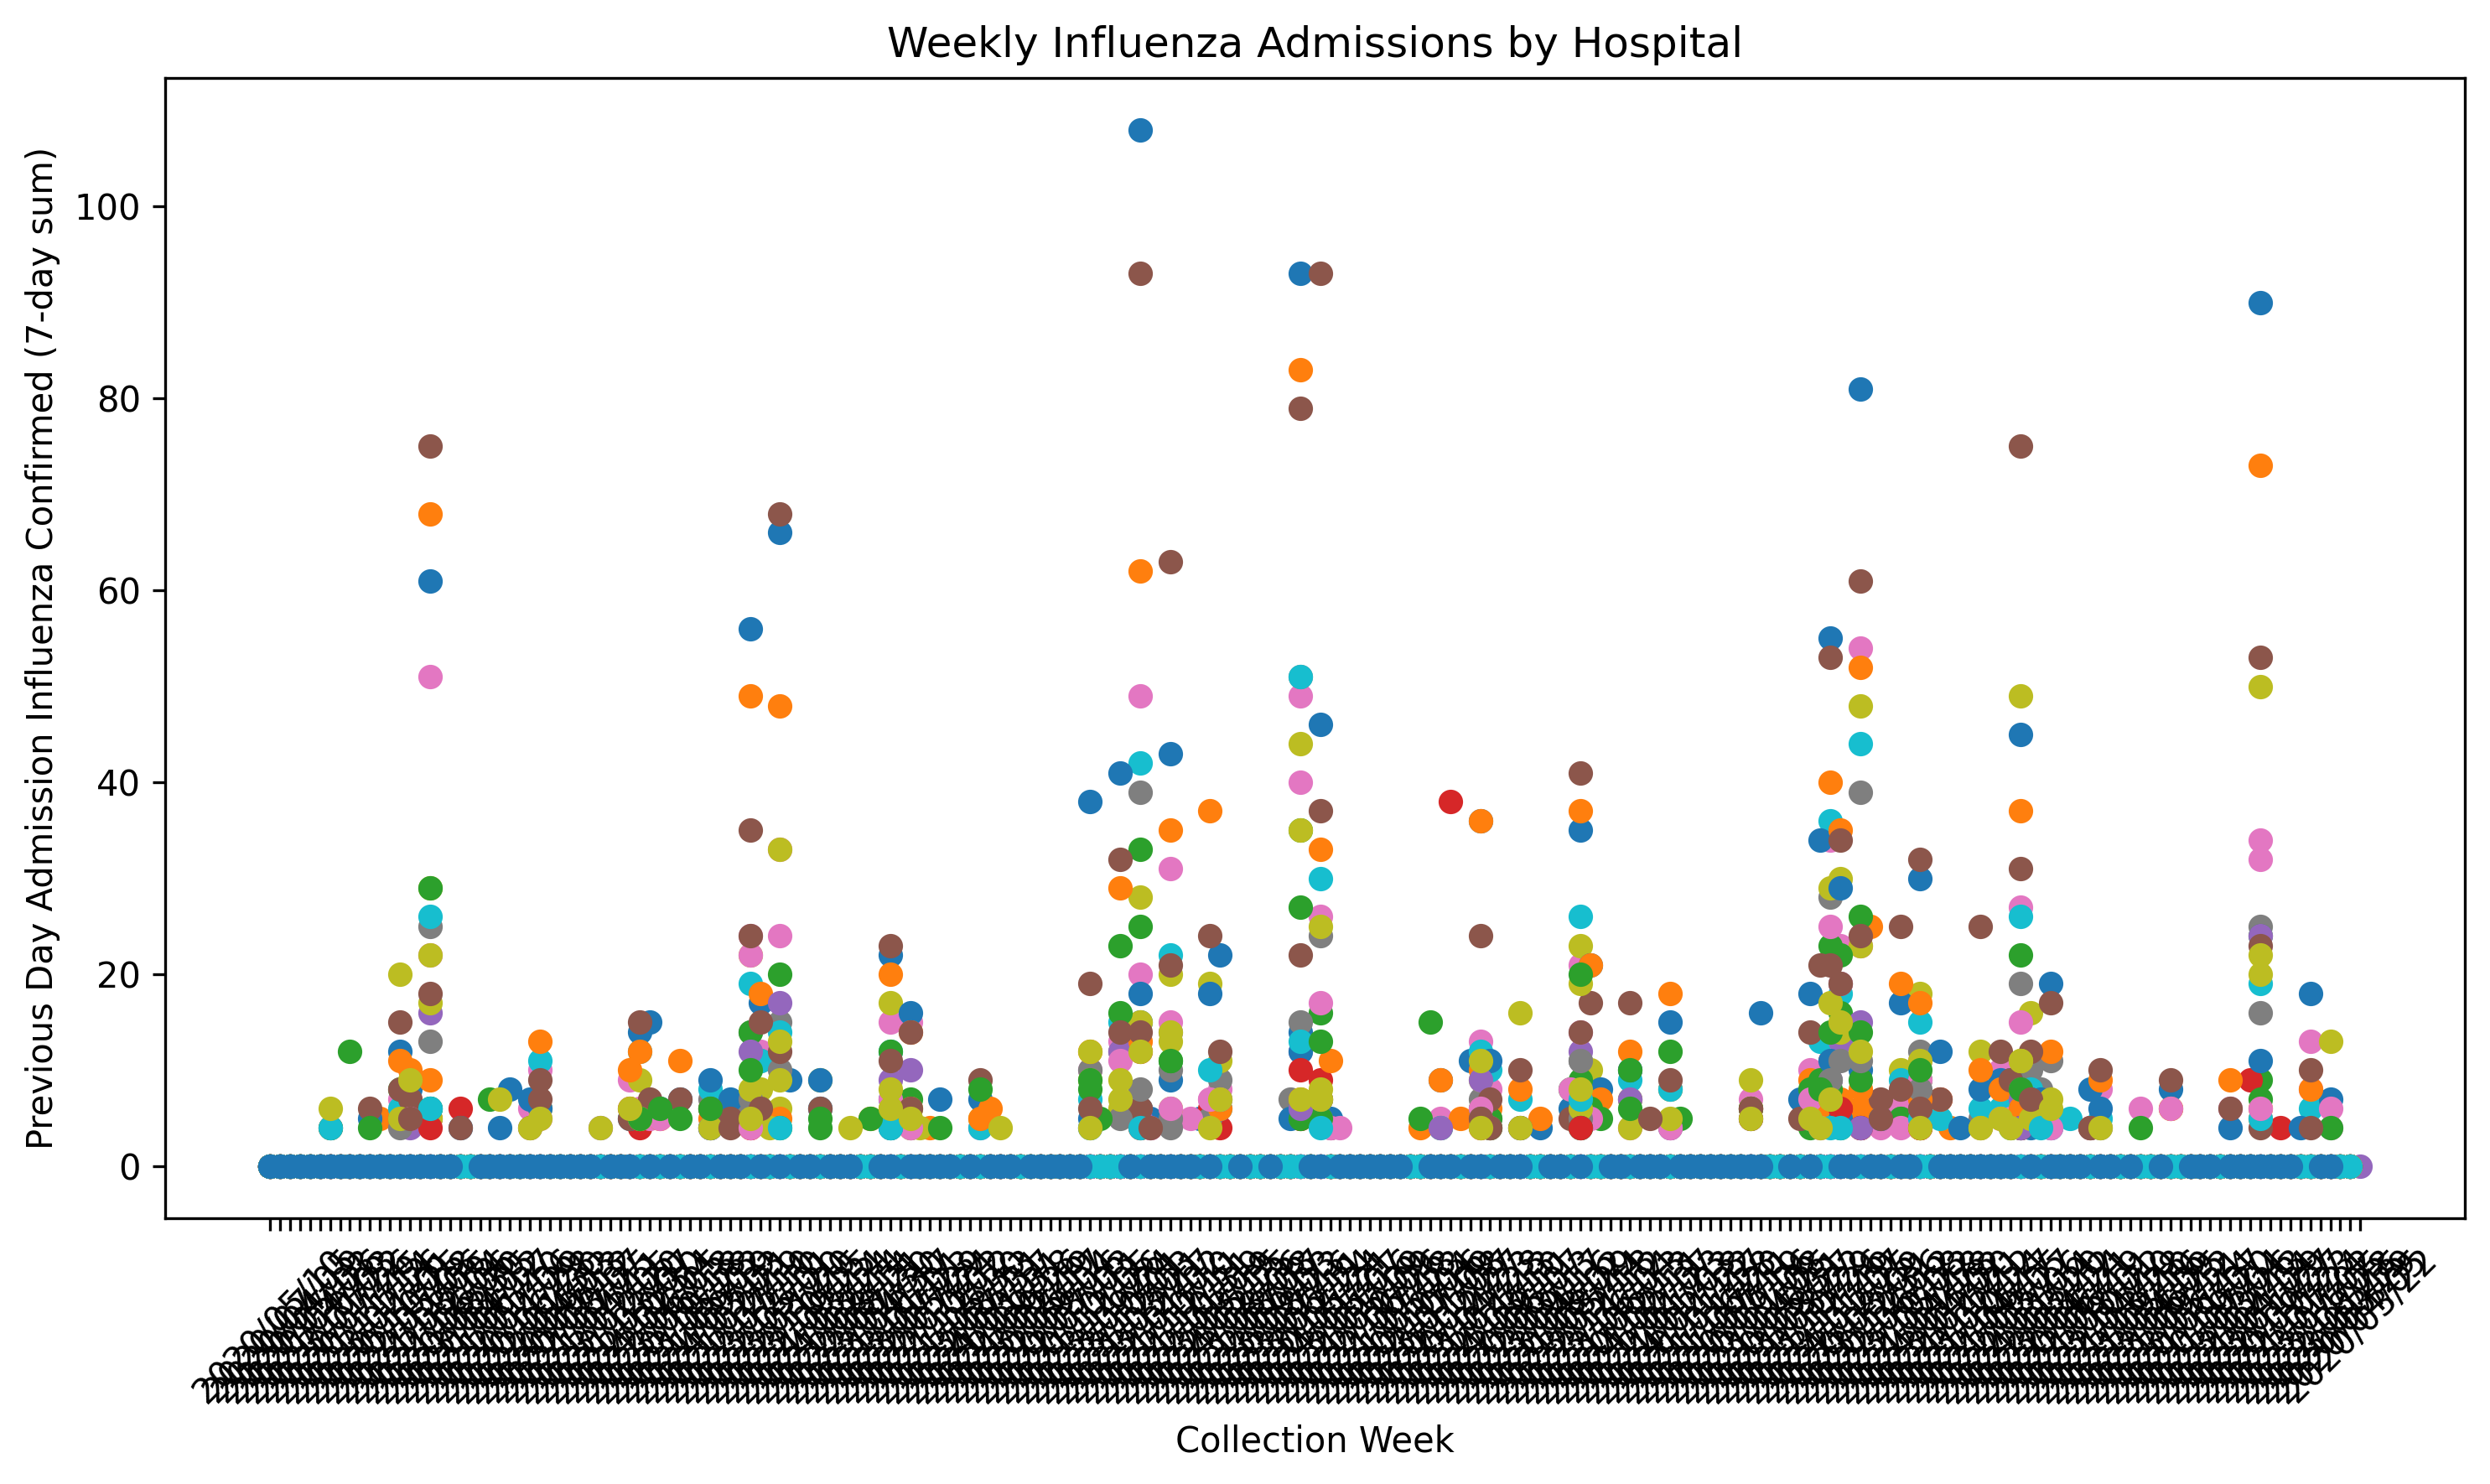

In [41]:
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(10, 6), dpi = 300)

# Loop through each hospital in the DataFrame
for index, row in Maricopa_Facility_df.iterrows():
    weeks = list(row['collection_week'])
    admissions = list(row['previous_day_admission_influenza_confirmed_7_day_sum'])
    
    plt.scatter(weeks, admissions, marker='o', label=row['hospital_name'])

plt.xlabel('Collection Week')
plt.ylabel('Previous Day Admission Influenza Confirmed (7-day sum)')
plt.title('Weekly Influenza Admissions by Hospital')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout() 
plt.show()


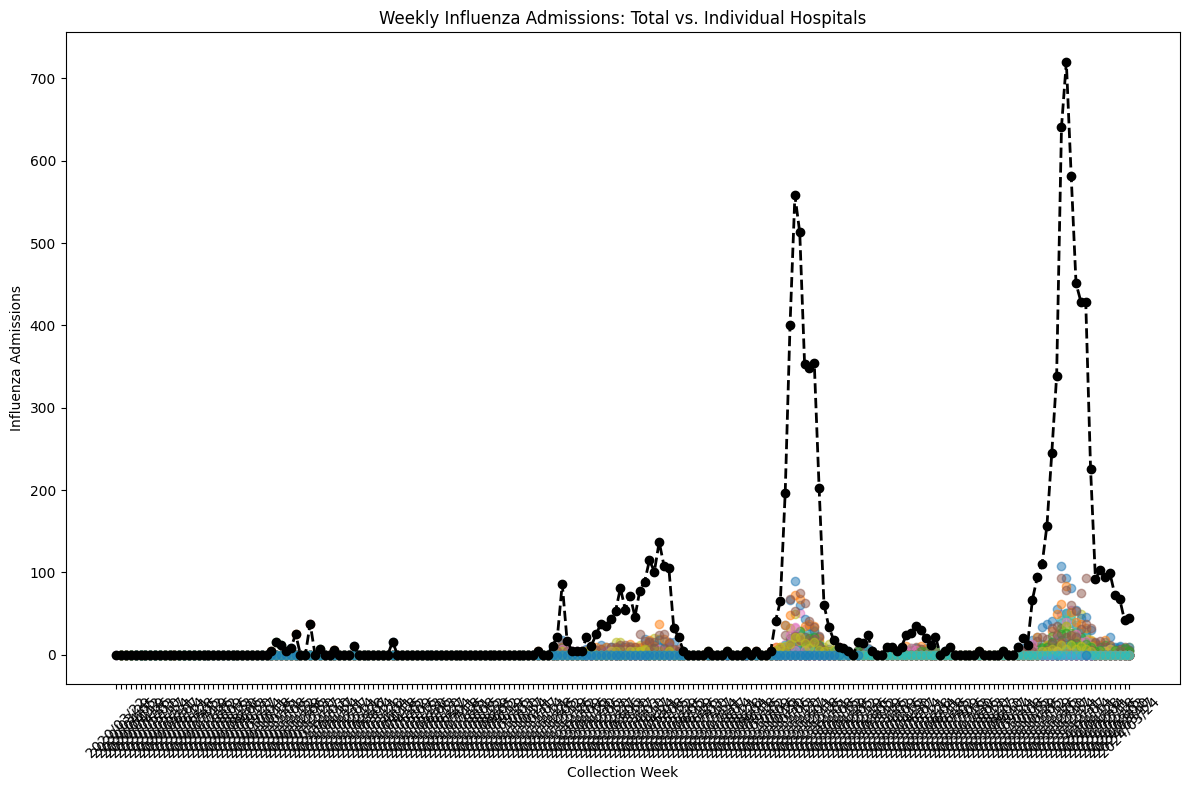

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Maricopa_Facility' is your original DataFrame with all hospital data

# Aggregate the data
columns_to_sum = ['previous_day_admission_influenza_confirmed_7_day_sum']
flu_grouped = Maricopa_Facility.groupby('collection_week')[columns_to_sum].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Plot the aggregated data
plt.plot(flu_grouped['collection_week'], flu_grouped['previous_day_admission_influenza_confirmed_7_day_sum'], label='Total Admissions', linewidth=2, marker='o', linestyle='--', color='black')

# Now, let's plot each hospital as before for comparison (simplified version)
# Assuming 'Maricopa_Facility_df' is the DataFrame with aggregated lists per hospital as you previously described
for index, row in Maricopa_Facility_df.iterrows():
    hospital_name = row['hospital_name']
    collection_weeks = row['collection_week']
    admissions = row['previous_day_admission_influenza_confirmed_7_day_sum']
    plt.scatter(collection_weeks, admissions, label=hospital_name, alpha=0.5)  # Set alpha for transparency

# Adding plot elements
plt.title('Weekly Influenza Admissions: Total vs. Individual Hospitals')
plt.xlabel('Collection Week')
plt.ylabel('Influenza Admissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


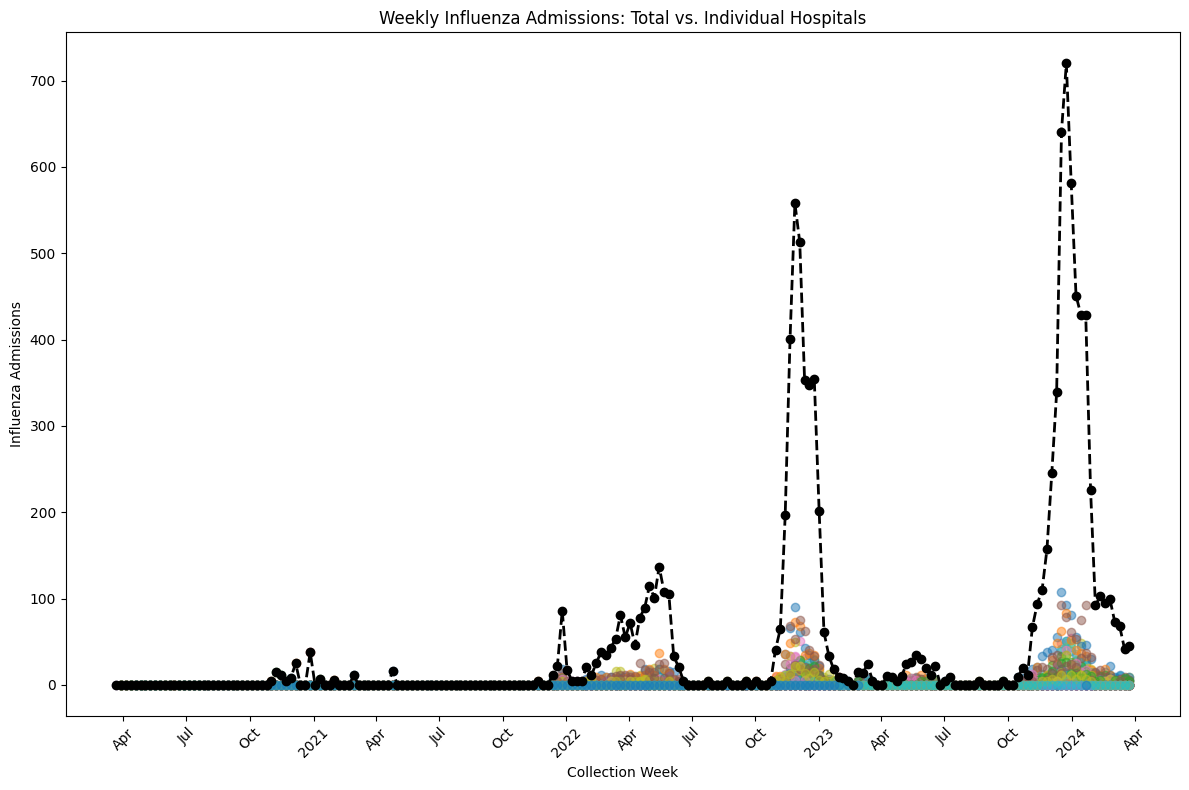

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'Maricopa_Facility' and 'Maricopa_Facility_df' as your DataFrames

# Convert 'collection_week' to datetime if not already done
flu_grouped['collection_week'] = pd.to_datetime(flu_grouped['collection_week'])

# Assuming 'Maricopa_Facility_df' has 'collection_week' in a list of strings format,
# Convert those to datetime in the plotting loop below

# Plotting
plt.figure(figsize=(12, 8))

# Plot the aggregated data
plt.plot(flu_grouped['collection_week'], flu_grouped['previous_day_admission_influenza_confirmed_7_day_sum'], label='Total Admissions', linewidth=2, marker='o', linestyle='--', color='black')

# Formatter for the x-axis
locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10))  # every 3 months
formatter = mdates.ConciseDateFormatter(locator)

# Now, let's plot each hospital as before for comparison
for index, row in Maricopa_Facility_df.iterrows():
    hospital_name = row['hospital_name']
    
    # Convert 'collection_weeks' from string to datetime
    collection_weeks = pd.to_datetime(row['collection_week'])
    
    admissions = row['previous_day_admission_influenza_confirmed_7_day_sum']
    plt.scatter(collection_weeks, admissions, label=hospital_name, alpha=0.5)  # Set alpha for transparency

# Setting the locator and formatter for the x-axis
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Adding plot elements
plt.title('Weekly Influenza Admissions: Total vs. Individual Hospitals')
plt.xlabel('Collection Week')
plt.ylabel('Influenza Admissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
Maricopa_Facility = Maricopa_Facility.filter(["hospital_pk",
                      "zip",
                      "hospital_name",
                      "fips_code",
                      "address",
                      "collection_week",
                      'total_beds_7_day_sum',
                      'inpatient_beds_used_7_day_sum',
                      "total_patients_hospitalized_confirmed_influenza_7_day_avg",
                      "total_patients_hospitalized_confirmed_influenza_7_day_sum",
                      "total_patients_hospitalized_confirmed_influenza_7_day_coverage",
                      "previous_day_admission_influenza_confirmed_7_day_sum"])

maricopa_flu = maricopa_data.filter(["hospital_pk",
                      "zip",
                      "hospital_name",
                      "fips_code",
                      "address",
                      'state',
                      'city'])

maricopa_flu['count'] = 1

flu['collection_week'] = pd.to_datetime(flu['collection_week'])

# Filter data only within Maricopa county 
flu = flu[flu['fips_code'] == '04013']

# Filter the dataset by years 
flu = flu[(flu['collection_week'] >= '2022-10-01') & (flu['collection_week'] <= '2023-12-31')]

# Filter and remove negative values for 'total_patients_hospitalized_confirmed_influenza_7_day_avg'
flu.drop(flu[flu['total_patients_hospitalized_confirmed_influenza_7_day_avg'] < 0].index, inplace=True)
flu.dropna(subset=['total_patients_hospitalized_confirmed_influenza_7_day_avg'], inplace=True)

# Filter and remove negative values for 'total_beds_7_day_sum'
flu.drop(flu[flu['total_beds_7_day_sum'] < 0].index, inplace=True)
flu.dropna(subset=['total_beds_7_day_sum'], inplace=True)

# Filter and remove negative values for 'inpatient_beds_used_7_day_sum'
flu.drop(flu[flu['inpatient_beds_used_7_day_sum'] < 0].index, inplace=True)
flu.dropna(subset=['inpatient_beds_used_7_day_sum'], inplace=True)

# Filter and remove negative values for 'total_patients_hospitalized_confirmed_influenza_7_day_sum'
flu.drop(flu[flu['total_patients_hospitalized_confirmed_influenza_7_day_sum'] < 0].index, inplace=True)
flu.dropna(subset=['total_patients_hospitalized_confirmed_influenza_7_day_sum'], inplace=True)

# Filter and remove negative values for 'total_patients_hospitalized_confirmed_influenza_7_day_coverage'
flu.drop(flu[flu['total_patients_hospitalized_confirmed_influenza_7_day_coverage'] < 0].index, inplace=True)
flu.dropna(subset=['total_patients_hospitalized_confirmed_influenza_7_day_coverage'], inplace=True)

# Filter and remove negative values for 'previous_day_admission_influenza_confirmed_7_day_sum'
flu.drop(flu[flu['previous_day_admission_influenza_confirmed_7_day_sum'] < 0].index, inplace=True)
flu.dropna(subset=['previous_day_admission_influenza_confirmed_7_day_sum'], inplace=True)

# Group by 'collection_week' and sum the specified columns within each group
columns_to_sum = ["total_patients_hospitalized_confirmed_influenza_7_day_avg",
                  "total_patients_hospitalized_confirmed_influenza_7_day_sum",
                  "total_patients_hospitalized_confirmed_influenza_7_day_coverage",
                  "previous_day_admission_influenza_confirmed_7_day_sum"]


columns_to_gather = ['address',
                     'city',
                     'state',
                     ]

# Group by 'hospital_name' and aggregate the 'columns_to_gather' using first() method
hospital_locations = maricopa_flu.groupby('hospital_name')[columns_to_gather].first().reset_index()

hospital_1 = flu[flu['hospital_name'] == 'BANNER - UNIVERSITY MEDICAL CENTER PHOENIX']
hospital_2 = flu[flu['hospital_name'] == 'DIGNITY HEALTH - ARIZONA GENERAL HOSPITAL']
hospital_3 = flu[flu['hospital_name'] == "ST. JOSEPH'S HOSPITAL AND MEDICAL CENTER"]

hospital_1_grouped = hospital_1.groupby('collection_week')[columns_to_sum].sum().reset_index()
hospital_2_grouped = hospital_2.groupby('collection_week')[columns_to_sum].sum().reset_index()
hospital_3_grouped = hospital_3.groupby('collection_week')[columns_to_sum].sum().reset_index()
flu_grouped = flu.groupby('collection_week')[columns_to_sum].sum().reset_index()

flu_grouped['count'] = 1

MCMC = flu_grouped.filter(['collection_week', 'previous_day_admission_influenza_confirmed_7_day_sum', "total_patients_hospitalized_confirmed_influenza_7_day_avg"], axis=1).to_csv(f"{dir}/utility/MCMC.csv", index=False)


In [14]:
import pandas as pd
from sodapy import Socrata

client = Socrata("healthdata.gov", None)

# Initialize an empty DataFrame
all_results_df = pd.DataFrame()

# Set initial parameters for pagination
limit = 2000  # Adjust based on what the API supports
offset = 0    # Start at the beginning
while True:
    # Fetch a batch of data
    results = client.get("anag-cw7u", limit=limit, offset=offset)

    # If no more data is returned, stop the loop
    if not results:
        break

    # Convert to pandas DataFrame and append to the overall DataFrame
    results_df = pd.DataFrame.from_records(results)
    all_results_df = pd.concat([all_results_df, results_df], ignore_index=True)

    # Update the offset to get the next batch of data
    offset += limit


KeyboardInterrupt: 

In [12]:
import pandas as pd

url = "https://healthdata.gov/resource/anag-cw7u.csv"

try:
    data = pd.read_csv(url)
    display = data.head()
except Exception as e:
    display = str(e)

data

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
0,050056,2020-06-28T00:00:00.000,CA,50056.0,ANTELOPE VALLEY HOSPITAL,1600 W AVE J,LANCASTER,93534.0,Short Term,6037.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
1,050127,2020-03-29T00:00:00.000,CA,50127.0,WOODLAND MEMORIAL HOSPITAL,1325 COTTONWOOD STREET,WOODLAND,95695.0,Short Term,6113.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
2,050515,2020-06-14T00:00:00.000,CA,50515.0,KAISER FOUNDATION HOSPITAL - ZION,4647 ZION AVE,SAN DIEGO,92120.0,Short Term,6073.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
3,050516,2020-03-29T00:00:00.000,CA,50516.0,MERCY SAN JUAN MEDICAL CENTER,6501 COYLE AVE,CARMICHAEL,95608.0,Short Term,6067.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
4,050690,2020-05-10T00:00:00.000,CA,50690.0,KAISER FOUNDATION HOSPITAL-SANTA ROSA,401 BICENTENNIAL WAY,SANTA ROSA,95403.0,Short Term,6097.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,370001,2020-05-24T00:00:00.000,OK,370001.0,HILLCREST MEDICAL CENTER,1120 SOUTH UTICA AVENUE,TULSA,74104.0,Short Term,40143.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
996,370020,2020-05-10T00:00:00.000,OK,370020.0,MERCY HOSPITAL ADA,430 NORTH MONTE VISTA,ADA,74820.0,Short Term,40123.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
997,370028,2020-05-17T00:00:00.000,OK,370028.0,"INTEGRIS BAPTIST MEDICAL CENTER, INC",3300 NORTHWEST EXPRESSWAY,OKLAHOMA CITY,73112.0,Short Term,40109.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
998,370216,2020-03-29T00:00:00.000,OK,370216.0,TULSA SPINE & SPECIALTY HOSPITAL,6901 SOUTH OLYMPIA AVENUE,TULSA,74132.0,Short Term,40143.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN


# EpyMoRPH Simulation


In [6]:
def construct_ipm():
    symbols = create_symbols(
        compartments=[
            compartment('S'),
            compartment('I'),
            compartment('R'),
            compartment('H', tags=['immobile'])
        ],
        attributes=[
            param('beta', shape=Shapes.TxN),
            param('gamma', shape=Shapes.TxN),
            param('xi', shape=Shapes.TxN),
            param('hospitalization_prob', shape=Shapes.TxN),
            param('hospitalization_duration', shape=Shapes.TxN)
        ])

    [S, I, R, H] = symbols.compartment_symbols
    [β, γ, ξ, h_prob, h_dur] = symbols.attribute_symbols


    N = Max(1, S + I + R + H)

    return create_model(
        symbols=symbols,
        transitions=[
            edge(S, I, rate=β * S * I / N),
            fork(
                edge(I, H, rate=γ * I * h_prob),
                edge(I, R, rate=γ * I * (1 - h_prob)),
            ),
            edge(H, R, rate=H / h_dur),
            edge(R, S, rate=ξ * R),
        ]
    )


SDH_IPM = construct_ipm()

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-31 (150 days)
• 2494 geo nodes
|####################| 100% 
Runtime: 467.202s


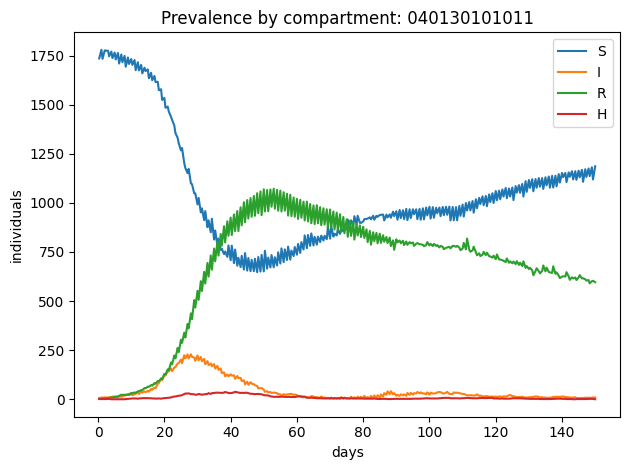

In [10]:
sim = StandardSimulation(
    geo = geo_library['maricopa_cbg_2019'](),
    ipm = SDH_IPM,
    mm = mm_library['centroids'](),
    params={
        'beta': 0.45,
        'gamma': 0.25,
        'xi': 0.0111,
        'hospitalization_prob': 0.1,
        'hospitalization_duration': 7.0,
        'phi': 40,
    },
    time_frame=TimeFrame.of("2015-01-01", 150),
    initializer=partial(single_location, location=0, seed_size=10)
)

with sim_messaging(sim):
    output = sim.run()

plot_pop(output, pop_idx=0)